In [10]:
import numpy as np
import pandas as pd

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

%matplotlib inline

In [16]:
train_data = pd.read_csv("Training.csv").dropna(axis = 1)
test_data =pd.read_csv("Testing.csv").dropna(axis = 1)

In [17]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [18]:
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [19]:
train_data.shape

(4920, 133)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [21]:
train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


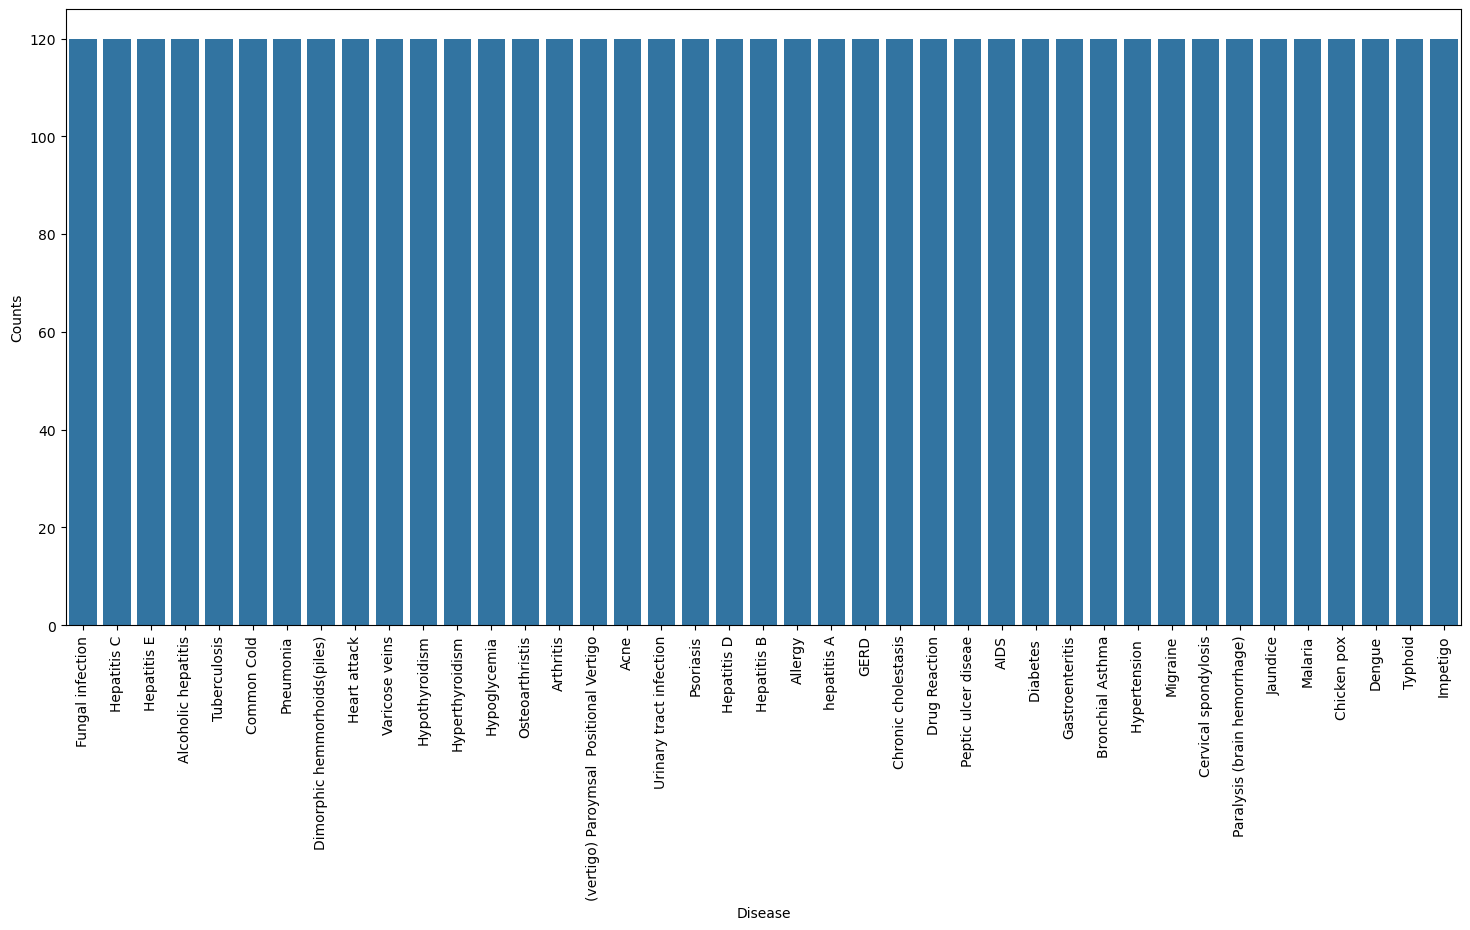

In [22]:
# checking weather the dataset is balanced or not
disease_counts = train_data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease":disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x ="Disease",y="Counts",data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [23]:
# Encoding the target value into numerical value
encoder = LabelEncoder()
train_data["prognosis"] =encoder.fit_transform(train_data["prognosis"])

In [24]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state =24)

In [25]:
X_train.shape,y_train.shape

((3936, 132), (3936,))

In [26]:
X_test.shape,y_test.shape

((984, 132), (984,))

In [27]:
#Defining scoring metric for k-fold cross validation
def cv_scoring(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))


models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

# producing cross validation score for models

for model_name in models:
    model =models[model_name]
    scores = cross_val_score(model,X,y,cv=10,
                            n_jobs = -1,
                            scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


# Training and Testing Models


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


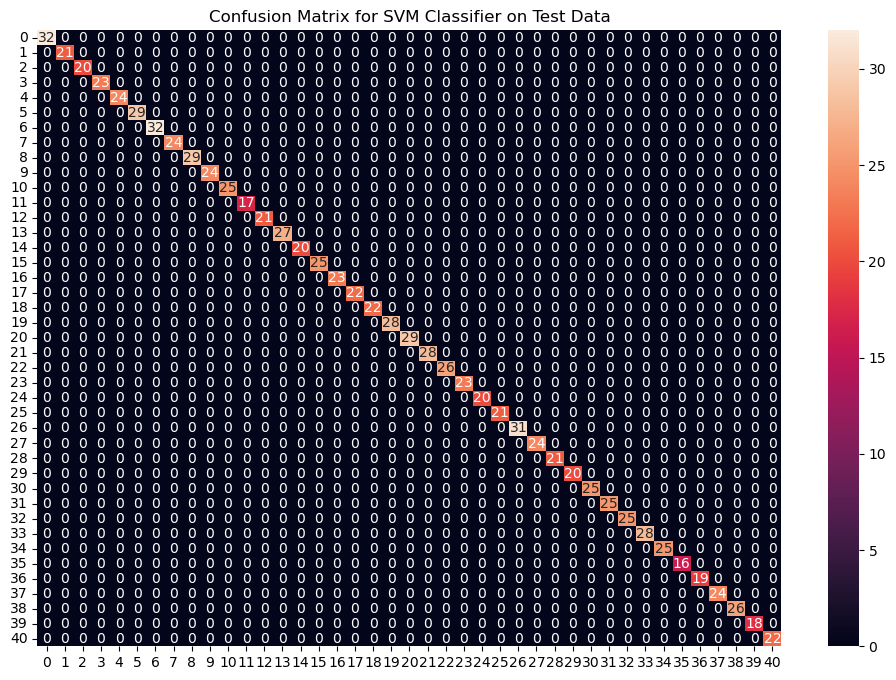

In [28]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train,y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()


Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


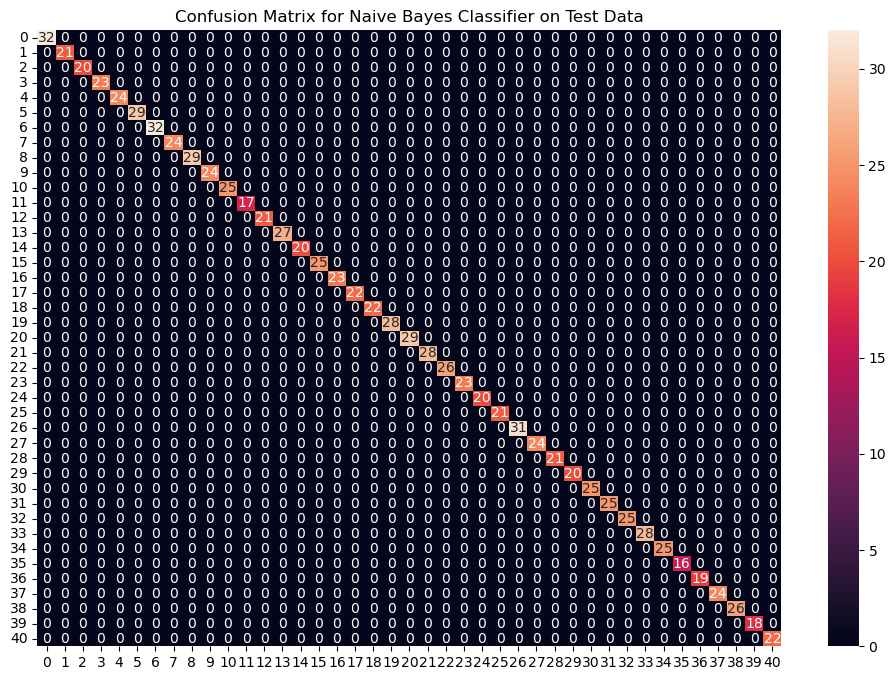

In [29]:

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()


Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


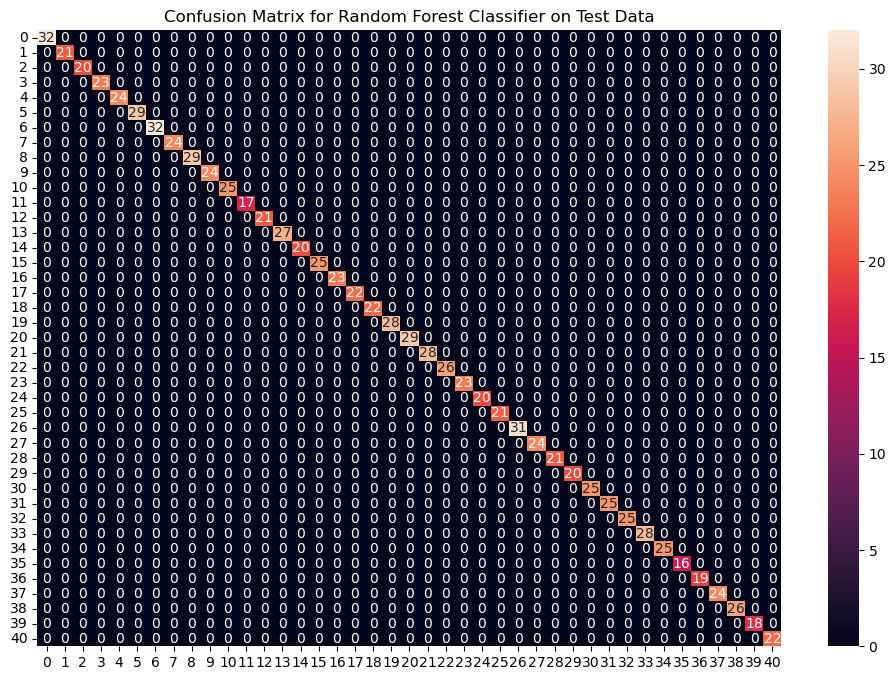

In [30]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model: 100.0


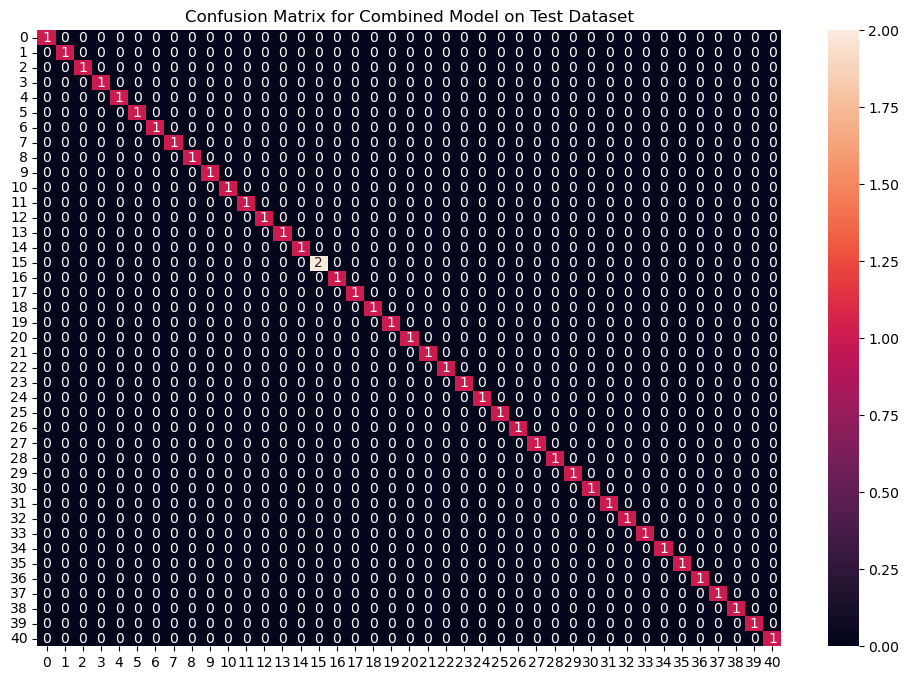

In [31]:
from statistics import mode
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [32]:
# Import the necessary libraries
import warnings
from sklearn.exceptions import DataConversionWarning

# Disable the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Rest of the code
# ...

# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

In [33]:
import json
from fuzzywuzzy import fuzz

# Load disease information from diseases_info.json
with open('disease_info.json', 'r') as file:
    disease_data = json.load(file)

# Function to retrieve disease information based on user input
def get_disease_info(disease_name):
    best_match = None
    best_score = 0

    # Iterate through disease names and find the best match
    for known_disease_name in disease_data.keys():
        similarity_score = fuzz.ratio(disease_name.lower(), known_disease_name.lower())
        if similarity_score > best_score:
            best_score = similarity_score
            best_match = known_disease_name

    # If a reasonably similar disease name is found, return its information
    if best_score >= 70:  # You can adjust this threshold as needed
        return disease_data[best_match]
    else:
        return "Disease not found in the database."



This is to create A data dictionary for the symtpms for prediction

In [34]:
symptoms = X.columns.values

symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.lower() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}
print(symptom_index)

{'itching': 0, 'skin rash': 1, 'nodal skin eruptions': 2, 'continuous sneezing': 3, 'shivering': 4, 'chills': 5, 'joint pain': 6, 'stomach pain': 7, 'acidity': 8, 'ulcers on tongue': 9, 'muscle wasting': 10, 'vomiting': 11, 'burning micturition': 12, 'spotting  urination': 13, 'fatigue': 14, 'weight gain': 15, 'anxiety': 16, 'cold hands and feets': 17, 'mood swings': 18, 'weight loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches in throat': 22, 'irregular sugar level': 23, 'cough': 24, 'high fever': 25, 'sunken eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish skin': 32, 'dark urine': 33, 'nausea': 34, 'loss of appetite': 35, 'pain behind the eyes': 36, 'back pain': 37, 'constipation': 38, 'abdominal pain': 39, 'diarrhoea': 40, 'mild fever': 41, 'yellow urine': 42, 'yellowing of eyes': 43, 'acute liver failure': 44, 'fluid overload': 45, 'swelling of stomach': 46, 'swelled lymph nodes': 47, 'malaise': 48, 'blurred and

This Cell Runs the main Function of predicting dieases

In [37]:
import joblib
loaded_svm_model = joblib.load('final_svm_model.pkl')
loaded_nb_model = joblib.load('final_nb_model.pkl')
loaded_rf_model = joblib.load('final_rf_model.pkl')
data_dict =joblib.load('data_dict.pkl')

def predictDisease(input_symptoms):
    input_symptoms = input_symptoms.lower()
    symptoms = input_symptoms.split(",")

    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        symptom = symptom.strip() 
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
        else:
            return "Symptom '{}' not in the database.".format(symptom)

    if sum(input_data) == 0:
        return "None of the input symptoms are in the database."

    input_data = np.array(input_data).reshape(1, -1)

    rf_prediction = data_dict["predictions_classes"][loaded_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][loaded_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][loaded_svm_model.predict(input_data)[0]]

    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])

    if final_prediction not in data_dict["predictions_classes"]:
        return "Disease '{}' is not in the database.".format(final_prediction)

    pre = "You may be suffering from " + final_prediction + "\n"
    disease_info = get_disease_info(final_prediction)

    if isinstance(disease_info, dict):
        for key, value in disease_info.items():
            if isinstance(value, list):
                pre += key + ":\n"
                for item in value:
                    pre += "- " + item + "\n"
            else:
                pre += key + ": " + value + "\n"

    pre += "\n If you are still unsure about the prediction, please contact a medical professional for better advice."

    return pre
# Testing the function
#print(symptom_index)
print("\n\n")
print(predictDisease("Silly"))




Symptom 'silly' not in the database.


##Creating GUI for Application

In [38]:
from tkinter import *
BG_GRAY = "white"
BG_COLOR = "white"
TEXT_COLOR = "black"
bot_name = "Meddy"

FONT = "Poppins 14"
FONT_BOLD = "Helvetica 13 bold"
wel = 'This is Meddy a Symptom based Diease Predictor\nEnter your Symptoms for Meddy to predict your \ndieases\n'

class ChatApplication:

    def __init__(self):
        self.window = Tk()
        self._setup_main_window()

    def run(self):
        self.window.mainloop()

    def _setup_main_window(self):
        self.window.title("Meddy")
        self.window.resizable(width=True, height=True)
        self.window.configure(width=470, height=550, bg=BG_COLOR)

        # head label
        head_label = Label(self.window, bg=BG_COLOR, fg=TEXT_COLOR,
                           text="Meddy Disease Predictor", font=FONT_BOLD, pady=10)
        head_label.place(relwidth=1)

        # tiny divider
        line = Label(self.window, width=450, bg=BG_GRAY)
        line.place(relwidth=1, rely=0.07, relheight=0.012)

        # text widget
        self.text_widget = Text(self.window, width=20, height=2, bg=BG_COLOR, fg=TEXT_COLOR,
                                font=FONT, padx=5, pady=5)
        self.text_widget.place(relheight=0.745, relwidth=0.954, rely=0.08)
        self.text_widget.insert(END, wel)

        # scroll bar
        scrollbar = Scrollbar(self.window)
        scrollbar.place(relheight=0.745, relx=0.964, rely=0.08)
        self.text_widget.configure(yscrollcommand=scrollbar.set)
        scrollbar.configure(command=self.text_widget.yview)

        self.text_widget.configure(cursor="arrow", state=DISABLED)

        # bottom label
        bottom_label = Label(self.window, bg=BG_GRAY, height=80)
        bottom_label.place(relwidth=1, rely=0.825)

        # message entry box
        self.msg_entry = Entry(bottom_label, bg="white", fg=TEXT_COLOR, font=FONT)
        self.msg_entry.place(relwidth=0.74, relheight=0.06, rely=0.008, relx=0.011)
        self.msg_entry.focus()
        self.msg_entry.bind("<Return>", self._on_enter_pressed)

        # send button
        send_button = Button(bottom_label, text="Send", font=FONT_BOLD, width=20, bg=BG_GRAY,
                             command=lambda: self._on_enter_pressed(None))
        send_button.place(relx=0.77, rely=0.008, relheight=0.06, relwidth=0.22)

    def _on_enter_pressed(self, event):
        msg = self.msg_entry.get()
        self._insert_message(msg, "You")

    def _insert_message(self, msg, sender):
        if not msg:
            return

        self.msg_entry.delete(0, END)
        msg1 = f"{sender}: {msg}\n\n"
        self.text_widget.configure(state=NORMAL)
        self.text_widget.insert(END, msg1)
        self.text_widget.configure(state=DISABLED)
        print(msg)
        msg2 = f"{bot_name}: {predictDisease(msg)}\n\n"
        self.text_widget.configure(state=NORMAL)
        self.text_widget.insert(END, msg2)
        self.text_widget.configure(state=DISABLED)

        self.text_widget.see(END)


if __name__ == "__main__":
    app = ChatApplication()
    app.run()

depress
tense
